# Подготовка датасета

In [25]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


def add_next_part(df, next_part):
    return pd.concat([df, next_part], ignore_index=True)

def replace_commas_and_convert_to_float(value):
    return float(value.replace(',', '.'))

feature = 'Отделка'

flats_df = pd.read_excel('../cian_spb.xlsx')
flats_df = flats_df.loc[:, [feature, "Общая площадь", "Жилая площадь", "Площадь кухни", "Стоимость"]]
flats_df.dropna(inplace=True)
numeric_columns = ["Общая площадь", "Жилая площадь", "Площадь кухни"]
flats_df[numeric_columns] = flats_df[numeric_columns].map(replace_commas_and_convert_to_float)
flats_df = flats_df.sample(frac=1)
df = flats_df

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=[feature]))
y = df[feature]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [27]:
def transform_labels(y):
    return np.where(y == 'Без отделки', 1, 0)
y_train = transform_labels(y_train)
y_test = transform_labels(y_test)

In [28]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

# Зависимость качества от количества слоёв

In [29]:
from sklearn.metrics import f1_score
from deeplearning import MLPClassifier

layers = 20
mlp_train_scores = [0] * layers
mlp_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = MLPClassifier(i, X_train.shape[1])
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    mlp_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train)) 
    mlp_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test)) 

In [30]:
from deeplearning import ResNetClassifier

resnet_train_scores = [0] * layers
resnet_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = ResNetClassifier(i, X_train.shape[1])
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    resnet_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    resnet_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

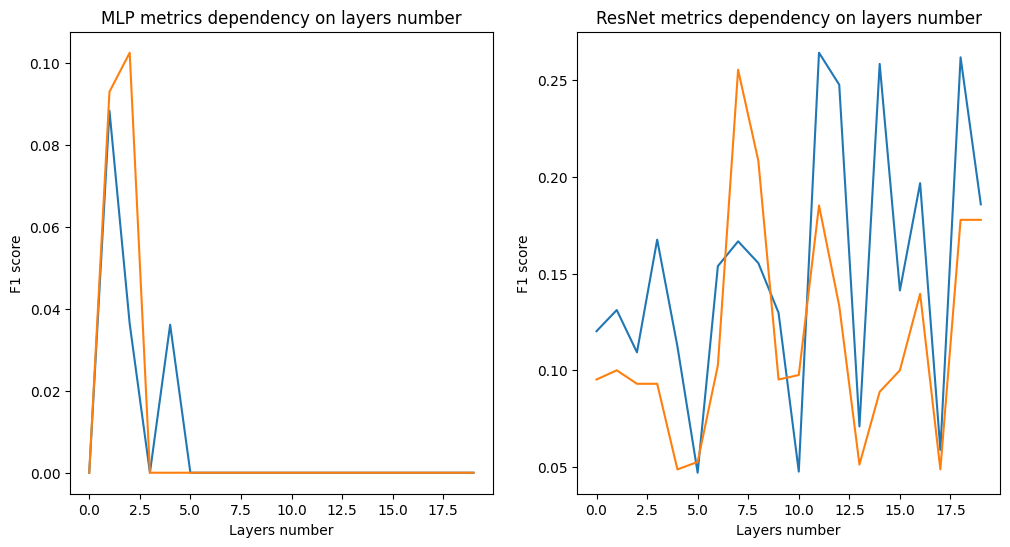

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('MLP metrics dependency on layers number')
ax[0].set_xlabel('Layers number')
ax[0].set_ylabel('F1 score')
ax[0].plot(mlp_train_scores, label='Train')
ax[0].plot(mlp_test_scores, label='Test')

ax[1].set_title('ResNet metrics dependency on layers number')
ax[1].set_xlabel('Layers number')
ax[1].set_ylabel('F1 score')
ax[1].plot(resnet_train_scores, label='Train')
ax[1].plot(resnet_test_scores, label='Test')

# С Xavier инициализацией

In [32]:
from sklearn.metrics import f1_score
from deeplearning import MLPClassifier

layers = 20
mlp_train_scores = [0] * layers
mlp_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = MLPClassifier(i, X_train.shape[1], xavier=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    mlp_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    mlp_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

In [33]:
from deeplearning import ResNetClassifier

resnet_train_scores = [0] * layers
resnet_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = ResNetClassifier(i, X_train.shape[1], xavier=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    resnet_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    resnet_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

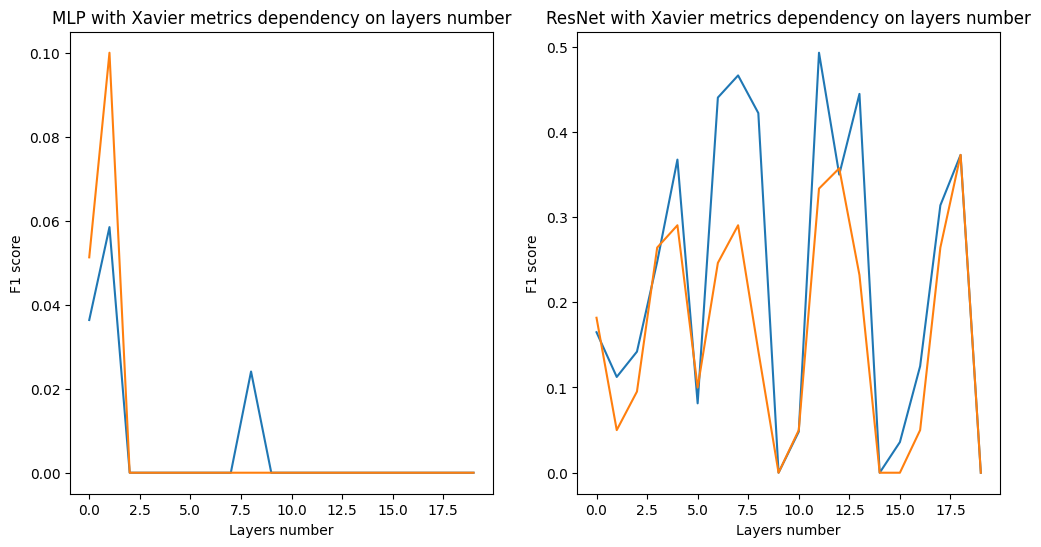

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('MLP with Xavier metrics dependency on layers number')
ax[0].set_xlabel('Layers number')
ax[0].set_ylabel('F1 score')
ax[0].plot(mlp_train_scores, label='Train')
ax[0].plot(mlp_test_scores, label='Test')

ax[1].set_title('ResNet with Xavier metrics dependency on layers number')
ax[1].set_xlabel('Layers number')
ax[1].set_ylabel('F1 score')
ax[1].plot(resnet_train_scores, label='Train')
ax[1].plot(resnet_test_scores, label='Test')

# С batch нормализацией

In [35]:
from sklearn.metrics import f1_score
from deeplearning import MLPClassifier

layers = 20
mlp_train_scores = [0] * layers
mlp_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = MLPClassifier(i, X_train.shape[1], batch_norm=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    mlp_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    mlp_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

In [36]:
from deeplearning import ResNetClassifier

resnet_train_scores = [0] * layers
resnet_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = ResNetClassifier(i, X_train.shape[1], batch_norm=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    resnet_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    resnet_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

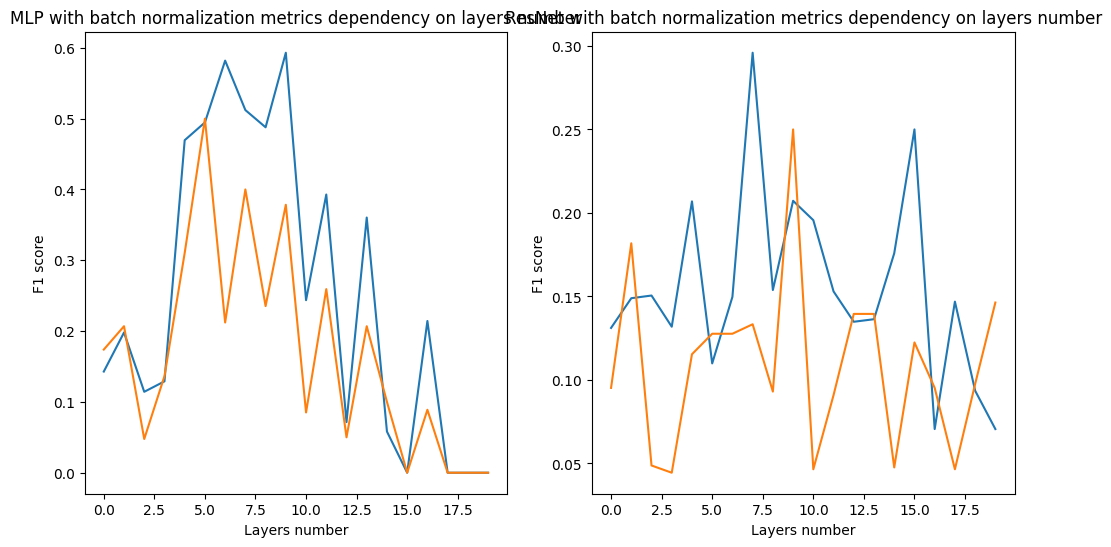

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('MLP with batch normalization metrics dependency on layers number')
ax[0].set_xlabel('Layers number')
ax[0].set_ylabel('F1 score')
ax[0].plot(mlp_train_scores, label='Train')
ax[0].plot(mlp_test_scores, label='Test')

ax[1].set_title('ResNet with batch normalization metrics dependency on layers number')
ax[1].set_xlabel('Layers number')
ax[1].set_ylabel('F1 score')
ax[1].plot(resnet_train_scores, label='Train')
ax[1].plot(resnet_test_scores, label='Test')

# Прореживание ResNet

In [38]:
from deeplearning import ResNetClassifier

X_first, X_second, y_first, y_second = train_test_split(X_train, y_train, train_size=0.5)
resnet = ResNetClassifier(50, X_first.shape[1])
resnet.fit(X_first, y_first, epochs=1000, lr=0.1, X_test=X_test, y_test=y_test)
good_blocks = resnet.model.cut(X_first)

In [39]:
usual_resnet = ResNetClassifier(50, X_train.shape[1])
usual_resnet.fit(X_train, y_train, epochs=1000, lr=0.1, X_test=X_test, y_test=y_test)

In [40]:
new_resnet = ResNetClassifier(50, X_first.shape[1], blocks=good_blocks)
new_resnet.fit(X_second, y_second, epochs=1000, lr=0.1, X_test=X_test, y_test=y_test)

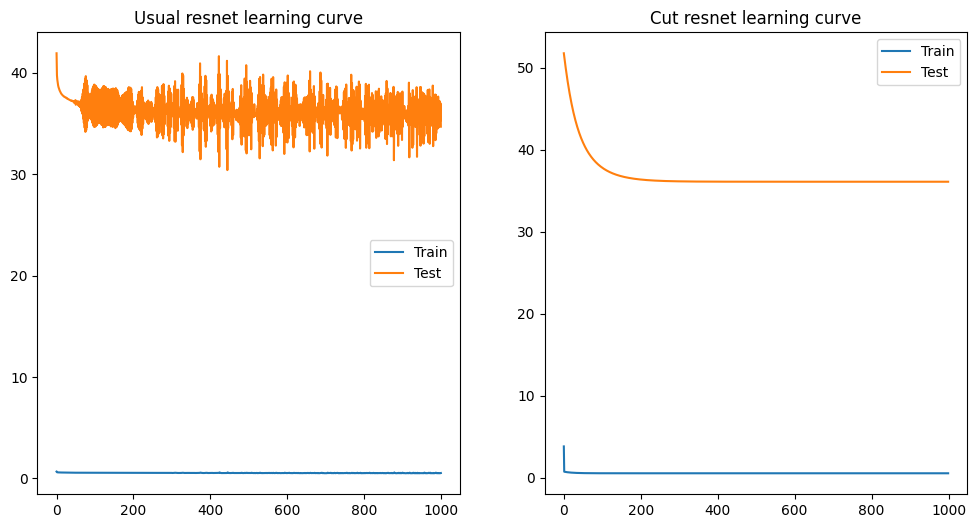

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Usual resnet learning curve')
ax[0].plot(usual_resnet.train_history, label='Train')
ax[0].plot(usual_resnet.test_history, label='Test')
ax[0].legend()
ax[1].set_title('Cut resnet learning curve')
ax[1].plot(new_resnet.train_history, label='Train')
ax[1].plot(new_resnet.test_history, label='Test')
ax[1].legend()